<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Отток-клиентов" data-toc-modified-id="Отток-клиентов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Отток клиентов</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-данные-на--дубликаты" data-toc-modified-id="Проверим-данные-на--дубликаты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверим данные на  дубликаты</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Новое-представление-данных" data-toc-modified-id="Новое-представление-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Новое представление данных</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Инициализируем-функцию-оптимизации-классификатора" data-toc-modified-id="Инициализируем-функцию-оптимизации-классификатора-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Инициализируем функцию оптимизации классификатора</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>RandomForest</a></span><ul class="toc-item"><li><span><a href="#Результаты" data-toc-modified-id="Результаты-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Результаты</a></span></li></ul></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>LogisticRegression</a></span><ul class="toc-item"><li><span><a href="#Результаты" data-toc-modified-id="Результаты-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Результаты</a></span></li><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#Результаты" data-toc-modified-id="Результаты-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Результаты</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

RANDOM = 42
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#  Подготовка данных

In [2]:
frame = pd.read_csv("/datasets/Churn.csv")


In [3]:
frame = frame.drop(["RowNumber","CustomerId","Surname"], axis = 1)

In [4]:
frame.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [6]:
frame.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Проверим данные на  дубликаты

In [7]:
print("Количесвто дубликатов:",frame.duplicated().sum())

Количесвто дубликатов: 0


In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
objects = ['object']
newdf = frame.select_dtypes(include=numerics)
newdf_object = frame.select_dtypes(include=objects)

In [9]:
numeric_columns = newdf.columns[:-1]


In [10]:
numeric_columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [11]:
frame = pd.get_dummies(frame, drop_first=True)

## Обработка пропусков

Заметим, что в одном из столбцов есть пропуски, есть три варианта решения:
1. Удалить объекты с пропущенными значениями, так как количество их не очень велико(порядка 9-10%)
2. Заменить пропуски на минимальное значение
3. Заменить пропуски на медианное значение  

Для достоверности, проверим все три метода и выберем с наибольшим результатом


In [12]:
frameOut = frame.dropna(subset = ["Tenure"], axis = 0)
#Так как пропуски у нас только в одном столбце, то функцию можно применить сразу к всему фрейму
frameMin = frame.fillna(0) 
frameMedian = frame.copy()
frameMedian['Tenure'] = frameMedian["Tenure"].fillna(frameMedian["Tenure"].median())

In [13]:
frameOut_nan = sum(frameOut.isnull().sum())
frameMin_nan = sum(frameMin.isnull().sum())
frameMedian_nan = sum(frameMedian.isnull().sum())
print("Количество пропусков в frameOut: {}, frameMin: {}, frameMedian: {}".format(frameOut_nan,
                                                                                  frameMin_nan,
                                                                                  frameMedian_nan
                                                                                 ))

Количество пропусков в frameOut: 0, frameMin: 0, frameMedian: 0


#  Исследование задачи

Разделим выборки на тренировочные и валидационные. Так как нам нужно разделить 3 выборки, что бы каждый раз не прописывать параметры для разделения напишем  функцию с необходимыми параметрами.

In [14]:
def split_data(features, target):
    (features_train,
     features_valid,
     target_train,
     target_valid) = train_test_split(features,
                                      target,
                                      test_size = 0.33,
                                      random_state = RANDOM)
    (features_test,
     features_valid,
     target_test,
     target_valid) = train_test_split(features_valid,
                                      target_valid,
                                      test_size = 0.5,
                                      random_state = RANDOM)
    
    return (features_train,
            features_valid,
            features_test,
            target_train,
            target_valid,
            target_test)


In [15]:
(featuresOut_train,
 featuresOut_valid,
 featuresOut_test,
 targetOut_train,
 targetOut_valid,
 targetOut_test) = split_data(frameOut.drop(["Exited"], axis = 1),
                              frameOut["Exited"])

(featuresMin_train,
 featuresMin_valid,
 featuresMin_test,
 targetMin_train,
 targetMin_valid,
 targetMin_test) = split_data(frameMin.drop(["Exited"], axis = 1),
                              frameMin["Exited"])

(featuresMedian_train,
 featuresMedian_valid,
 featuresMedian_test,
 targetMedian_train,
 targetMedian_valid,
 targetMedian_test) = split_data(frameMedian.drop(["Exited"], axis = 1),
                              frameMedian["Exited"])


In [16]:
balance_rate_frameOut = list(targetOut_train.value_counts(normalize=True))
balance_rate_frameMin = list(targetMin_train.value_counts(normalize=True))
balance_rate_frameMedian = list(targetMedian_train.value_counts(normalize=True))
print("""Баланс классов: 
    frameOut: {}, 
    frameMin: {}, 
    frameMedian: {}""".format(balance_rate_frameOut,
                              balance_rate_frameMin,
                              balance_rate_frameMedian))

Баланс классов: 
    frameOut: [0.7962233169129721, 0.20377668308702793], 
    frameMin: [0.7919402985074627, 0.2080597014925373], 
    frameMedian: [0.7919402985074627, 0.2080597014925373]


In [17]:
scalerOut = StandardScaler()
scalerMin = StandardScaler()
scalerMedian = StandardScaler()

scalerOut.fit(featuresOut_train[numeric_columns])
scalerMin.fit(featuresMin_train[numeric_columns])
scalerMedian.fit(featuresMedian_train[numeric_columns])

featuresOut_train[numeric_columns] = scalerOut.transform(featuresOut_train[numeric_columns])
featuresMin_train[numeric_columns] = scalerMin.transform(featuresMin_train[numeric_columns])
featuresMedian_train[numeric_columns] = scalerMedian.transform(featuresMedian_train[numeric_columns])

featuresOut_valid[numeric_columns] = scalerOut.transform(featuresOut_valid[numeric_columns])
featuresMin_valid[numeric_columns] = scalerMin.transform(featuresMin_valid[numeric_columns])
featuresMedian_valid[numeric_columns] = scalerMedian.transform(featuresMedian_valid[numeric_columns])

featuresOut_test[numeric_columns] = scalerOut.transform(featuresOut_test[numeric_columns])
featuresMin_test[numeric_columns] = scalerMin.transform(featuresMin_test[numeric_columns])
featuresMedian_test[numeric_columns] = scalerMedian.transform(featuresMedian_test[numeric_columns])

Баланс классов во всех трех выборках практически одинаковый 79% отрицательного класса и 21% положительного

#  Борьба с дисбалансом

У нас три пути решения этой проблемы:
1. Upsampling
1. Downsampling
1. Добавить в модель параметр class_weight

Реализуем все 3 способа поочередно

## Upsampling

In [18]:
def upsampling(feature,target,rate):
    feature_one = feature[target == 1]
    target_one = target[target == 1]
    feature_zero = feature[target == 0]
    target_zero = target[target == 0]
    
    features = pd.concat([feature_one] * round(rate) + [feature_zero] )
    targets = pd.concat([target_one] * round(rate) + [target_zero] )
    
    features,target = shuffle(features,targets,random_state = RANDOM)
    
    return features,targets

In [19]:
featuresOut_train_upsampling,targetOut_train_upsampling = upsampling(featuresOut_train,
                                          targetOut_train,
                                          (balance_rate_frameOut[0]/balance_rate_frameOut[1]))
featuresMin_train_upsampling,targetMin_train_upsampling = upsampling(featuresMin_train,
                                          targetMin_train,
                                          (balance_rate_frameMin[0]/balance_rate_frameMin[1]))
featuresMedian_train_upsampling,targetMedian_train_upsampling= upsampling(featuresMedian_train,
                                          targetMedian_train,
                                          (balance_rate_frameMedian[0]/balance_rate_frameMedian[1]))

## Downsampling

In [20]:
def downsampling(feature,target,rate):
    feature_one = feature[target == 1]
    target_one = target[target == 1]
    feature_zero = feature[target == 0]
    target_zero = target[target == 0]
    feature_zero_down = feature_zero.sample(frac = 1/round(rate),random_state = RANDOM)
    target_zero_down =  target_zero.sample(frac = 1/round(rate),random_state = RANDOM)
    features = pd.concat([feature_one]  + [feature_zero_down])
    targets = pd.concat([target_one] + [target_zero_down])
    
    features,target = shuffle(features,targets,random_state = RANDOM)
    
    return features,targets

Для удобства начнем добавлять полученные данные в массив

In [21]:
featuresOut_train_downsampling,targetOut_train_downsampling = downsampling(featuresOut_train,
                                          targetOut_train,
                                          (balance_rate_frameOut[0]/balance_rate_frameOut[1]))
featuresMin_train_downsampling,targetMin_train_downsampling = downsampling(featuresMin_train,
                                          targetMin_train,
                                          (balance_rate_frameMin[0]/balance_rate_frameMin[1]))
featuresMedian_train_downsampling,targetMedian_train_downsampling= downsampling(featuresMedian_train,
                                          targetMedian_train,
                                          (balance_rate_frameMedian[0]/balance_rate_frameMedian[1]))

## Новое представление данных

Создадим массив, в котором будем хранить все возможные сочетания методов заполнения пропусков и методов выравнивания

In [22]:
train_list = []
train_list.append((featuresOut_train_upsampling,targetOut_train_upsampling))
train_list.append((featuresMin_train_upsampling,targetMin_train_upsampling))
train_list.append((featuresMedian_train_upsampling,targetMedian_train_upsampling))
train_list.append((featuresOut_train_downsampling,targetOut_train_downsampling))
train_list.append((featuresMin_train_downsampling,targetMin_train_downsampling))
train_list.append((featuresMedian_train_downsampling,targetMedian_train_downsampling))
train_list.append((featuresOut_train,targetOut_train))
train_list.append((featuresMin_train,targetMin_train))
train_list.append((featuresMedian_train,targetMedian_train))

In [23]:
valid_list = []
valid_list.append((featuresOut_valid,targetOut_valid))
valid_list.append((featuresMin_valid,targetMin_valid))
valid_list.append((featuresMedian_valid,targetMedian_valid))
valid_list.append((featuresOut_valid,targetOut_valid))
valid_list.append((featuresMin_valid,targetMin_valid))
valid_list.append((featuresMedian_valid,targetMedian_valid))
valid_list.append((featuresOut_valid,targetOut_valid))
valid_list.append((featuresMin_valid,targetMin_valid))
valid_list.append((featuresMedian_valid,targetMedian_valid))

In [24]:
test_list = []
test_list.append((featuresOut_test,targetOut_test))
test_list.append((featuresMin_test,targetMin_test))
test_list.append((featuresMedian_test,targetMedian_test))
test_list.append((featuresOut_test,targetOut_test))
test_list.append((featuresMin_test,targetMin_test))
test_list.append((featuresMedian_test,targetMedian_test))
test_list.append((featuresOut_test,targetOut_test))
test_list.append((featuresMin_test,targetMin_test))
test_list.append((featuresMedian_test,targetMedian_test))

#  Тестирование модели

## Инициализируем функцию оптимизации классификатора


In [25]:
def best_threshold(target_vector,predictions,model_name):
    # Первичное получение данных метрики ROC-кривой
    fpr, tpr, thresholds = roc_curve(np.array(target_vector), predictions, pos_label=1)
    best_accuracy = 0
    best_f1 = 0
    best_threshold = -1
    best_threshold_f1 = -1
    #Найдем площадь под кривой
    auc_value = round(auc(fpr,tpr),2)
    
    #Если площадь будеть меньше 0.5, это означает, что нужно нужно вычесть каждую вероятность из 1
    if auc_value < 0.5:
        predictions = 1 - predictions
        fpr, tpr, thresholds = roc_curve(np.array(target_vector), predictions.data.numpy(), pos_label=1)
        auc_value = round(auc(fpr,tpr),2)
        
    # переберем все пороги в поисках наилучшей точности
    for threshold in thresholds:
        pre_marker = np.array(predictions > threshold)
        accuracy = accuracy_score(target_vector,pre_marker)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold

    for threshold in thresholds:
        pre_marker = np.array(predictions > threshold)
        f1_threshold = f1_score(target_vector,pre_marker)
        if f1_threshold > best_f1:
            best_f1 = f1_threshold
            best_threshold_f1 = threshold
            
    #Построим ROC-кривую
    fig,ax = plt.subplots(figsize= (10,5))
    ax.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),label = 'BaseLine',ls = '--')
    ax.plot(fpr,
            tpr,
            label = f"{model_name} (area = {auc_value}, best_accuracy = {best_accuracy}, best_f1 = {best_f1})")
    ax.legend()
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    print("Best f1: {}, threshold: {}".format(best_f1,best_threshold_f1))
    print("Best accuracy: {}, threshold: {}".format(best_accuracy,best_threshold))
    

In [26]:
def fit_and_compare(train_list,valid_list,parameters,model):
    best_score = 0
    for index,(train_data,valid_data) in tqdm(enumerate(zip(train_list,valid_list))):

        modelOut = model(random_state=RANDOM,class_weight="balanced")
        Grid = GridSearchCV(modelOut, parameters,scoring="f1")

        Grid.fit(train_data[0],train_data[1])
        valid_score = f1_score(valid_data[1],Grid.best_estimator_.predict(valid_data[0]))

        print()
        print("-----------------")
        print("Index: ",index)
        print("Best score:",Grid.best_score_)
        print("f1 score (valid):",valid_score) 
        print("-----------------")

        if best_score < valid_score:
            best_score = valid_score
            best_model = Grid.best_estimator_
            best_index = index
    print("-----BEST------")
    print("Best index: ",best_index)
    print("Best f1 score (valid):",best_score) 
    print("---------------------")
    print(Grid.best_params_)
    params = Grid.best_params_
    return best_score, best_model, best_index,params



## RandomForest

In [27]:
(best_score_RandomForest,
 best_model_RandomForest,
 best_index_RandomForest,
 params_RandomForest) = fit_and_compare(train_list,
                                            valid_list,
                                            {"n_estimators":[5,100],"max_depth":[1,10]},
                                            RandomForestClassifier)

1it [00:04,  4.16s/it]


-----------------
Index:  0
Best score: 0.5656771195050747
f1 score (valid): 0.3316274309109519
-----------------


2it [00:08,  4.29s/it]


-----------------
Index:  1
Best score: 0.5002371718271231
f1 score (valid): 0.36704900938477586
-----------------


3it [00:13,  4.40s/it]


-----------------
Index:  2
Best score: 0.4979686546989554
f1 score (valid): 0.36610878661087864
-----------------


4it [00:15,  3.61s/it]


-----------------
Index:  3
Best score: 0.5718770570475676
f1 score (valid): 0.30787589498806683
-----------------


5it [00:16,  3.08s/it]


-----------------
Index:  4
Best score: 0.5169645390327039
f1 score (valid): 0.2944344703770197
-----------------


6it [00:18,  2.71s/it]


-----------------
Index:  5
Best score: 0.5043410908602991
f1 score (valid): 0.2629193109700816
-----------------


7it [00:22,  2.94s/it]


-----------------
Index:  6
Best score: 0.6093716413694114
f1 score (valid): 0.6331168831168831
-----------------


8it [00:26,  3.21s/it]


-----------------
Index:  7
Best score: 0.6088449207717163
f1 score (valid): 0.6308539944903582
-----------------


9it [00:30,  3.34s/it]


-----------------
Index:  8
Best score: 0.6150994306952736
f1 score (valid): 0.6340136054421769
-----------------
-----BEST------
Best index:  8
Best f1 score (valid): 0.6340136054421769
---------------------
{'max_depth': 10, 'n_estimators': 100}


In [28]:
print("Best f1 score (test):",f1_score(test_list[best_index_RandomForest][1],
                                       best_model_RandomForest.predict(
                                           test_list[best_index_RandomForest][0]))) 

Best f1 score (test): 0.5816993464052287


In [29]:
test_model = RandomForestClassifier(random_state=RANDOM,
                                    class_weight="balanced", 
                                    max_depth = params_RandomForest["max_depth"],
                                    n_estimators = params_RandomForest['n_estimators']  )

In [30]:
new_train_features = pd.concat([train_list[best_index_RandomForest][0]] + [valid_list[best_index_RandomForest][0]])
new_train_target = pd.concat([train_list[best_index_RandomForest][1]] + [valid_list[best_index_RandomForest][1]])

In [31]:
test_model.fit(new_train_features,new_train_target)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

### Результаты

In [32]:
print("Best f1 score (test):",f1_score(test_list[best_index_RandomForest][1],
                                       test_model.predict(
                                           test_list[best_index_RandomForest][0]))) 

Best f1 score (test): 0.5910543130990416


In [33]:
predictions_RandomForest = best_model_RandomForest.predict_proba(
    valid_list[best_index_RandomForest][0])[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best f1: 0.6412213740458015, threshold: 0.46067309338373197
Best accuracy: 0.8575757575757575, threshold: 0.6822658360812243


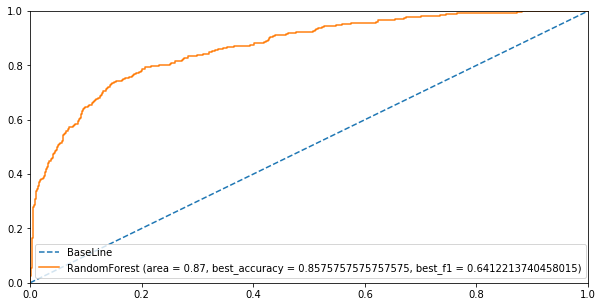

In [34]:
best_threshold(valid_list[best_index_RandomForest][1],predictions_RandomForest,"RandomForest")

## LogisticRegression

In [35]:
(best_score_LogisticRegression,
 best_model_LogisticRegression,
 best_index_LogisticRegression,
 params_LogisticRegression) = fit_and_compare(train_list,
                                            valid_list,
                                            {"C":np.arange(0.5,2,0.1),
                                             "solver":("liblinear", "saga"),
                                             "max_iter":[100,2000],"penalty":("l1", "l2")},
                                            LogisticRegression)

1it [01:12, 72.18s/it]


-----------------
Index:  0
Best score: 0.5050651705916763
f1 score (valid): 0.3519494204425711
-----------------


2it [02:25, 72.43s/it]


-----------------
Index:  1
Best score: 0.5026488571395489
f1 score (valid): 0.38294168842471715
-----------------


3it [03:37, 72.42s/it]


-----------------
Index:  2
Best score: 0.500430333302376
f1 score (valid): 0.3843478260869565
-----------------


4it [03:42, 52.27s/it]


-----------------
Index:  3
Best score: 0.5194439010329365
f1 score (valid): 0.2935960591133005
-----------------


5it [04:41, 54.09s/it]


-----------------
Index:  4
Best score: 0.5245244380562488
f1 score (valid): 0.2073265783320343
-----------------


6it [05:38, 55.05s/it]


-----------------
Index:  5
Best score: 0.5253737914986781
f1 score (valid): 0.2021772939346812
-----------------


7it [06:50, 60.09s/it]


-----------------
Index:  6
Best score: 0.4995532484338257
f1 score (valid): 0.4912280701754387
-----------------


8it [08:02, 63.59s/it]


-----------------
Index:  7
Best score: 0.4975008649196032
f1 score (valid): 0.503582395087001
-----------------


9it [09:14, 61.65s/it]


-----------------
Index:  8
Best score: 0.49801446187342696
f1 score (valid): 0.5005107252298264
-----------------
-----BEST------
Best index:  7
Best f1 score (valid): 0.503582395087001
---------------------
{'C': 0.6, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


### Результаты

In [36]:
print("Best f1 score (test):",f1_score(test_list[best_index_LogisticRegression][1],
                                       best_model_LogisticRegression.predict(
                                           test_list[best_index_LogisticRegression][0]))) 

Best f1 score (test): 0.4615384615384615


In [37]:


test_model_LogisticRegression = LogisticRegression(random_state=RANDOM,
                                class_weight="balanced", 
                                C = params_LogisticRegression["C"],
                                solver = params_LogisticRegression["solver"],
                                max_iter = params_LogisticRegression["max_iter"],
                                penalty = params_LogisticRegression["penalty"]
                               )

new_train_features_LogisticRegression = pd.concat(
    [train_list[best_index_LogisticRegression][0]] + [valid_list[best_index_LogisticRegression][0]])

new_train_target_LogisticRegression = pd.concat(
    [train_list[best_index_LogisticRegression][1]] + [valid_list[best_index_LogisticRegression][1]])

test_model_LogisticRegression.fit(new_train_features_LogisticRegression,
                                  new_train_target_LogisticRegression)

print("Best f1 score (test):",f1_score(test_list[best_index_LogisticRegression][1],
                                       test_model_LogisticRegression.predict(
                                           test_list[best_index_LogisticRegression][0]))) 

Best f1 score (test): 0.4617067833698031


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best f1: 0.5129943502824859, threshold: 0.5433820435548231
Best accuracy: 0.8054545454545454, threshold: 0.6963744166454371


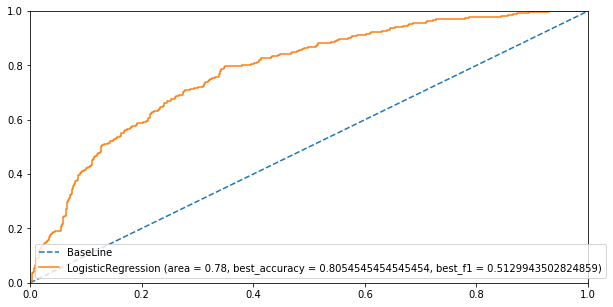

In [38]:
predictions_LogisticRegression = best_model_LogisticRegression.predict_proba(
    valid_list[best_index_LogisticRegression][0])[:,1]

best_threshold(valid_list[best_index_LogisticRegression][1],
               predictions_LogisticRegression,
               "LogisticRegression")

### DecisionTree

In [39]:
(best_score_DecisionTree,
 best_model_DecisionTree,
 best_index_DecisionTree,
 params_DecisionTree) = fit_and_compare(train_list,
                                            valid_list,
                                            {"criterion":("gini", "entropy"),
                                             "max_depth":[2,16]},
                                            DecisionTreeClassifier)

1it [00:01,  1.12s/it]


-----------------
Index:  0
Best score: 0.5085328213084853
f1 score (valid): 0.27017543859649124
-----------------


2it [00:02,  1.20s/it]


-----------------
Index:  1
Best score: 0.5260539590465538
f1 score (valid): 0.31587561374795414
-----------------


3it [00:03,  1.17s/it]


-----------------
Index:  2
Best score: 0.5260539590465538
f1 score (valid): 0.32140137090632137
-----------------


4it [00:03,  1.07it/s]


-----------------
Index:  3
Best score: 0.5763815713708678
f1 score (valid): 0.222509702457956
-----------------


5it [00:04,  1.28it/s]


-----------------
Index:  4
Best score: 0.5236268200120249
f1 score (valid): 0.24975609756097558
-----------------


6it [00:04,  1.45it/s]


-----------------
Index:  5
Best score: 0.5112862826040302
f1 score (valid): 0.2781875658587987
-----------------


7it [00:05,  1.55it/s]


-----------------
Index:  6
Best score: 0.502450196418801
f1 score (valid): 0.5134474327628362
-----------------


8it [00:06,  1.51it/s]


-----------------
Index:  7
Best score: 0.5073279654807915
f1 score (valid): 0.4979020979020979
-----------------


9it [00:06,  1.31it/s]


-----------------
Index:  8
Best score: 0.5038373901817095
f1 score (valid): 0.49375866851595007
-----------------
-----BEST------
Best index:  6
Best f1 score (valid): 0.5134474327628362
---------------------
{'criterion': 'gini', 'max_depth': 16}


### Результаты

In [40]:
print("Best f1 score (test):",f1_score(test_list[best_index_DecisionTree][1],
                                       best_model_DecisionTree.predict(
                                           test_list[best_index_DecisionTree][0]))) 

Best f1 score (test): 0.5


In [41]:


test_model_DecisionTree = DecisionTreeClassifier(random_state=RANDOM,
                                class_weight="balanced", 
                                criterion = params_DecisionTree["criterion"],
                                max_depth = params_DecisionTree["max_depth"],

                               )

new_train_features_DecisionTree = pd.concat(
    [train_list[best_index_DecisionTree][0]] + [valid_list[best_index_DecisionTree][0]])

new_train_target_DecisionTree = pd.concat(
    [train_list[best_index_DecisionTree][1]] + [valid_list[best_index_DecisionTree][1]])

test_model_DecisionTree.fit(new_train_features_DecisionTree,
                                  new_train_target_DecisionTree)

print("Best f1 score (test):",f1_score(test_list[best_index_DecisionTree][1],
                                       test_model_DecisionTree.predict(
                                           test_list[best_index_DecisionTree][0]))) 

Best f1 score (test): 0.4834123222748815


Best f1: 0.5170556552962298, threshold: 0.5723813317987986
Best accuracy: 0.820786142571619, threshold: 0.5723813317987986


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


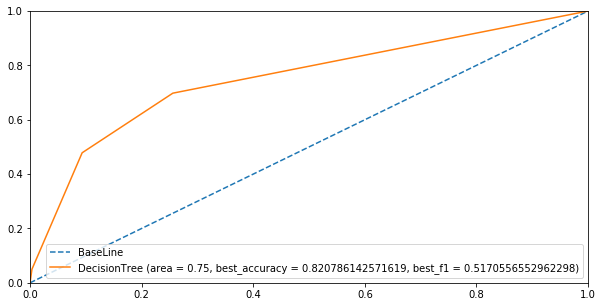

In [42]:
predictions_DecisionTree = best_model_DecisionTree.predict_proba(
    valid_list[best_index_DecisionTree][0])[:,1]

best_threshold(valid_list[best_index_DecisionTree][1],
               predictions_DecisionTree,
               "DecisionTree")

# Вывод


- Лучшая модель основана на RandomForest
- Лучший индекс: 7 (он означает, что лучше всего показала себя выборка, где пропуски были заполнены 0)
- Лучший показатель F1 метрики: 0.6150409530900968
- Лучший показатель ROC-AUC: 0.86
- Параметры, дающие лучший результат: {'max_depth': 10, 'n_estimators': 100}
- Лучше всего выравнивать через class_weight="balanced"